# Support Vector Machines (SVMs)

Support Vector Machines (SVMs) are supervised learning models used for both classification and regression tasks, particularly effective for classification in high-dimensional spaces. SVMs aim to find the optimal hyperplane that separates different classes in the feature space, making them powerful tools for various applications, including image classification, text classification, and bioinformatics.


## 2. Intuition Behind SVMs

The main idea behind SVMs is to find a hyperplane that best separates data points of different classes. The goal is to maximize the margin between data points of different classes and the hyperplane. Data points that are closest to the hyperplane are called support vectors.


## 3. SVMs for Classification

The SVM algorithm tries to maximize the distance between the closest data points (support vectors) of each class and the decision boundary. This maximum margin separation results in a more robust classifier.


## 4. SVM Hyperparameters

### Important SVM Hyperparameters
- **C**: Controls the trade-off between maximizing the margin and minimizing classification errors. Higher values of C focus on minimizing errors, potentially leading to a smaller margin.
- **Kernel**: Transforms the data space using functions like linear, polynomial, and radial basis function (RBF). 
- **Gamma**: Determines the influence of a single training example, especially in the case of non-linear kernels like RBF.


## 5. Kernel Trick

SVMs are originally designed for linear classification, but the kernel trick enables them to handle non-linear cases by transforming the feature space.

### Types of Kernels
- **Linear Kernel**: Used when data is linearly separable.
- **Polynomial Kernel**: Suitable for non-linear data with polynomial relationships.
- **Radial Basis Function (RBF) Kernel**: Commonly used for non-linear data with more complex relationships.


## 6. SVMs Implementation

We'll use the `scikit-learn` library to implement SVMs on a sample dataset and understand how it works in practice.


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load a sample dataset
data = datasets.load_iris()
X = data.data[:, :2]  # Take only two features (i.e sepal length and sepal width) for visualization purpose
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)#150 total row,30 percent of 150 

# Train an SVM classifier
svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45

Confusion Matrix:
 [[19  0  0]
 [ 0  7  6]
 [ 0  3 10]]


## Classification Report Explanation

The **classification report** provides detailed insights into the performance of a classification model, with the following metrics for each class:

- **Precision**: The proportion of correctly predicted positive observations out of the total observations predicted as positive. Higher precision means fewer false positives.
    $$
    \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
    $$
  
- **Recall**: The proportion of correctly predicted positive observations out of all observations that actually belong to the positive class. High recall indicates fewer false negatives.
    $$
    \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
    $$

- **F1-Score**: The harmonic mean of precision and recall, offering a balanced measure of both metrics. It is particularly useful when the class distribution is imbalanced.
  $$
  \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$

- **Support**: The number of true instances for each label in the dataset.

Here's a breakdown of the actual output:

| Class       | Precision | Recall | F1-Score | Support |
|-------------|-----------|--------|----------|---------|
| **0**       | 1.00      | 1.00   | 1.00     | 19      |
| **1**       | 0.70      | 0.54   | 0.61     | 13      |
| **2**       | 0.62      | 0.77   | 0.69     | 13      |
| **Accuracy**|           |        | 0.80     | 45      |
| **Macro Avg** | 0.78    | 0.77   | 0.77     | 45      |
| **Weighted Avg** | 0.81 | 0.80   | 0.80     | 45      |

### Interpretation:
- **Class 0** has perfect precision, recall, and F1-score, meaning all instances of class 0 were correctly classified with no errors.
- **Class 1** has lower precision and recall, resulting in a lower F1-score (0.61), indicating the model struggled more with distinguishing this class.
- **Class 2** has moderate precision (0.62) but higher recall (0.77), suggesting it captures most of the actual instances but at the cost of some false positives.

**Overall Accuracy**: The model achieved 80% accuracy across all classes.

**Macro Average**: The average metric calculated by taking the mean of precision, recall, and F1-scores across all classes without considering class imbalance.

**Weighted Average**: The average metric that accounts for class imbalance by weighting each class by its support.

## Confusion Matrix

The **confusion matrix** provides a summary of prediction results and helps to visualize where the model made errors. 

| Actual \ Predicted | Class 0 | Class 1 | Class 2 |
|--------------------|---------|---------|---------|
| **Class 0**        | 19      | 0       | 0       |
| **Class 1**        | 0       | 7       | 6       |
| **Class 2**        | 0       | 3       | 10      |

### Explanation:
- **Class 0**: All 19 instances were correctly classified as class 0.
- **Class 1**: Of 13 true instances, 7 were correctly classified, while 6 were misclassified as class 2.
- **Class 2**: Of 13 true instances, 10 were correctly classified, while 3 were misclassified as class 1.

This matrix shows that the model has some confusion between classes 1 and 2 but performs perfectly for class 0.


## 7. Visualizing the Decision Boundary

Let's visualize the decision boundaries created by our SVM classifier to better understand how SVM separates different classes.


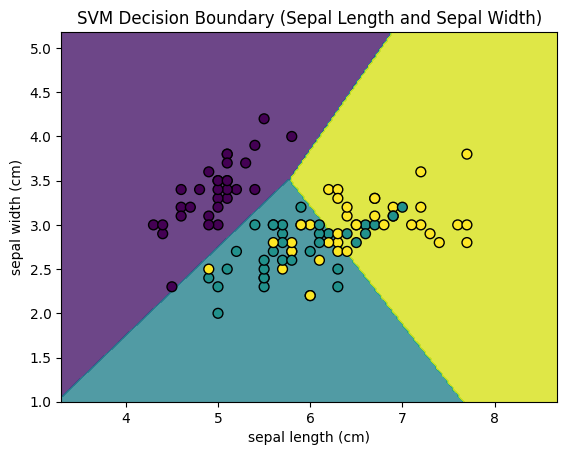

In [ ]:
# Function to plot the decision boundary
def plot_decision_boundary(clf, X, y):
    h = .02  # Step size in the mesh
    #ploting the boundries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    #mesh grid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.xlabel(data.feature_names[0])
    plt.ylabel(data.feature_names[1])
    plt.title("SVM Decision Boundary (Sepal Length and Sepal Width)")
    plt.show()

# Plotting decision boundary
plot_decision_boundary(svm_clf, X_train, y_train)


### Visualization of the next two features (Petal Length and Petal Width)

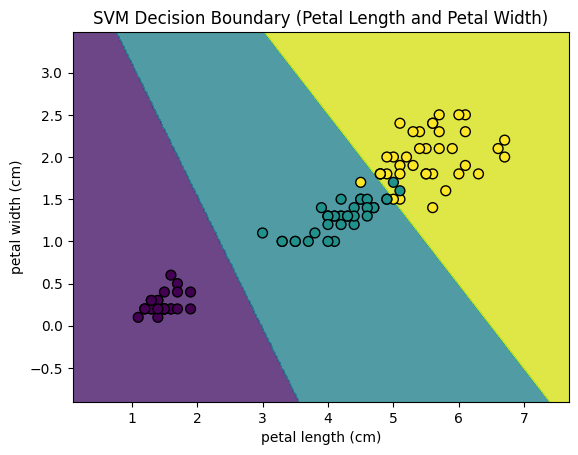

In [4]:
X = data.data  # load all four features: sepal length, sepal width, petal length, and petal width
y = data.target


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Select only the next two features for visualization (petal length and petal width)
X_vis = X_train[:, 2:4]  # Using only petal length and petal width

# Train the SVM classifier again on the selected features
svm_clf_vis = SVC(kernel='linear', C=1)
svm_clf_vis.fit(X_vis, y_train)

# Function to plot the decision boundary
def plot_decision_boundary(clf, X, y):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.xlabel(data.feature_names[2])  # Label for petal length
    plt.ylabel(data.feature_names[3])  # Label for petal width
    plt.title("SVM Decision Boundary (Petal Length and Petal Width)")
    plt.show()

# Plotting decision boundary for petal length and petal width
plot_decision_boundary(svm_clf_vis, X_vis, y_train)
